# House Price Prediction

Implementing a linear regression model to predict house prices based on square footage, bedrooms, and bathrooms involves cleaning the data, selecting relevant features, training the model, evaluating its performance, and using it to make predictions. This process helps in understanding how these factors influence house prices and provides insights into the real estate market dynamics.

# Import The Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
import statsmodels.api as sm  
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
data=pd.read_csv("C:\\Users\\Dell Latitude 3410\\Downloads\\data.csv")

In [3]:
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [4]:
data.tail()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
4595,2014-07-09 00:00:00,308166.666667,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,534333.333333,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,416904.166667,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,203400.000000,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA
4599,2014-07-10 00:00:00,220600.000000,3.0,2.50,1490,8102,2.0,0,0,4,1490,0,1990,0,18717 SE 258th St,Covington,WA 98042,USA


# Pre-Processing and Visualization

In [5]:
data_sample = data.sample(10)
data_sample.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
445,2014-05-09 00:00:00,325000.0,4.0,1.5,1470,70800,1.0,0,0,3,1470,0,1976,0,29606 SE 286 St,Ravensdale,WA 98051,USA
2637,2014-06-17 00:00:00,386000.0,2.0,2.5,1620,3196,2.0,0,0,3,1620,0,2008,0,9225-9305 Mitten Ave SE,Snoqualmie,WA 98065,USA
4046,2014-07-08 00:00:00,527700.0,5.0,2.5,2820,9375,1.0,0,0,4,1550,1270,1968,0,15910 SE 42nd Pl,Bellevue,WA 98006,USA
3435,2014-06-26 00:00:00,252750.0,4.0,1.0,1230,7410,1.5,0,0,3,1230,0,1944,0,650 SW 137th St,Burien,WA 98166,USA
1625,2014-05-30 00:00:00,315000.0,3.0,2.0,1060,5750,1.0,0,0,3,1060,0,1981,2013,5452 31st Ave SW,Seattle,WA 98126,USA


In [6]:
data.shape


(4600, 18)

In [7]:
data.dtypes

date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
street            object
city              object
statezip          object
country           object
dtype: object

In [8]:
data.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')

In [9]:
data.index

RangeIndex(start=0, stop=4600, step=1)

In [10]:
data.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [11]:
data = data.drop("date", axis=1 )
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [12]:
data["country"].value_counts()

country
USA    4600
Name: count, dtype: int64

In [13]:
data = data.drop("country", axis=1 )
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052


In [14]:
len(data["street"].unique())

4525

In [15]:
data['city'].value_counts()

city
Seattle                1573
Renton                  293
Bellevue                286
Redmond                 235
Issaquah                187
Kirkland                187
Kent                    185
Auburn                  176
Sammamish               175
Federal Way             148
Shoreline               123
Woodinville             115
Maple Valley             96
Mercer Island            86
Burien                   74
Snoqualmie               71
Kenmore                  66
Des Moines               58
North Bend               50
Covington                43
Duvall                   42
Lake Forest Park         36
Bothell                  33
Newcastle                33
SeaTac                   29
Tukwila                  29
Vashon                   29
Enumclaw                 28
Carnation                22
Normandy Park            18
Clyde Hill               11
Medina                   11
Fall City                11
Black Diamond             9
Ravensdale                7
Pacific        

In [16]:
cities = data.groupby('city')['price'].mean()
top_10_expensive_cities = cities.sort_values(ascending=False).head(10)


<Axes: ylabel='price'>

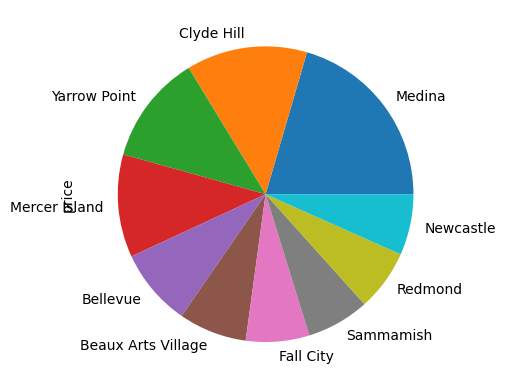

In [17]:
top_10_expensive_cities.plot(kind = 'pie')

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='yr_built', ylabel='price'>

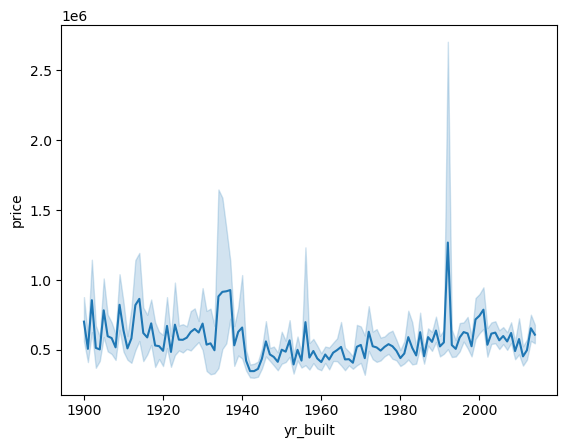

In [18]:
sns.lineplot(data,x = 'yr_built',y = 'price')

<Axes: xlabel='condition', ylabel='price'>

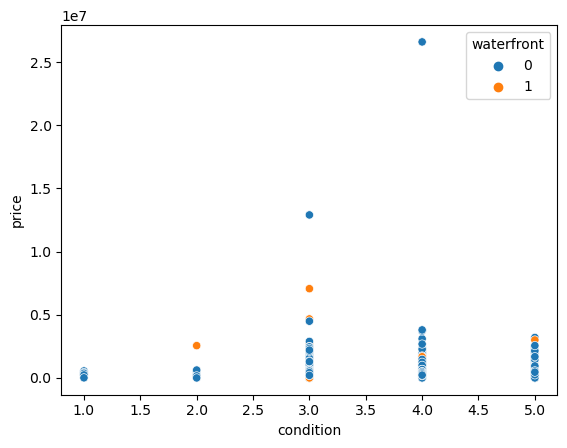

In [19]:
sns.scatterplot(data,x = 'condition',y = 'price',hue = 'waterfront')

In [20]:
data = data.drop("street", axis=1 )
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city,statezip
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,Shoreline,WA 98133
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,Seattle,WA 98119
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,Kent,WA 98042
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,Bellevue,WA 98008
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,Redmond,WA 98052


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          4600 non-null   float64
 1   bedrooms       4600 non-null   float64
 2   bathrooms      4600 non-null   float64
 3   sqft_living    4600 non-null   int64  
 4   sqft_lot       4600 non-null   int64  
 5   floors         4600 non-null   float64
 6   waterfront     4600 non-null   int64  
 7   view           4600 non-null   int64  
 8   condition      4600 non-null   int64  
 9   sqft_above     4600 non-null   int64  
 10  sqft_basement  4600 non-null   int64  
 11  yr_built       4600 non-null   int64  
 12  yr_renovated   4600 non-null   int64  
 13  city           4600 non-null   object 
 14  statezip       4600 non-null   object 
dtypes: float64(4), int64(9), object(2)
memory usage: 539.2+ KB


In [22]:
cities_with_best_view = data[data['view'] == 4]['city'].value_counts().head(5)
cities_with_best_view

city
Seattle          25
Bellevue          9
Sammamish         6
Mercer Island     5
Shoreline         5
Name: count, dtype: int64

In [23]:
top_cities = pd.DataFrame(top_10_expensive_cities)
top_cities.index

Index(['Medina', 'Clyde Hill', 'Yarrow Point', 'Mercer Island', 'Bellevue',
       'Beaux Arts Village', 'Fall City', 'Sammamish', 'Redmond', 'Newcastle'],
      dtype='object', name='city')

<Axes: xlabel='city'>

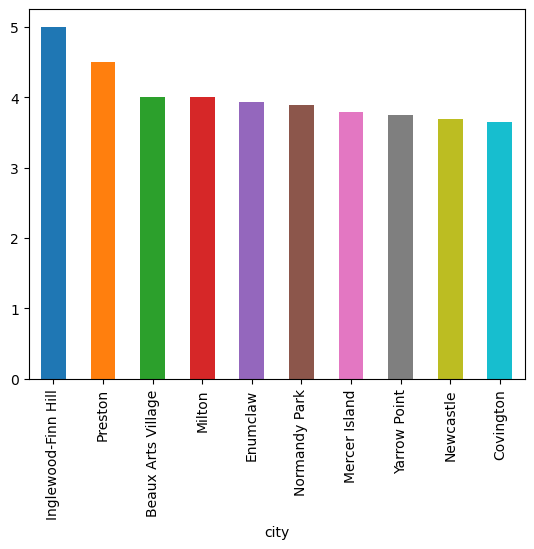

In [24]:
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', 
          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

data.groupby('city')['condition'].mean().sort_values(ascending = False).head(10).plot(kind = 'bar',color=colors)

In [25]:
data.nunique(axis=0)

price            1741
bedrooms           10
bathrooms          26
sqft_living       566
sqft_lot         3113
floors              6
waterfront          2
view                5
condition           5
sqft_above        511
sqft_basement     207
yr_built          115
yr_renovated       60
city               44
statezip           77
dtype: int64

In [26]:
data = data.drop("city" ,axis=1 )
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,statezip
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,WA 98133
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,WA 98119
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,WA 98042
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,WA 98008
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,WA 98052


In [27]:
data = data.drop("statezip" ,axis=1 )
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992


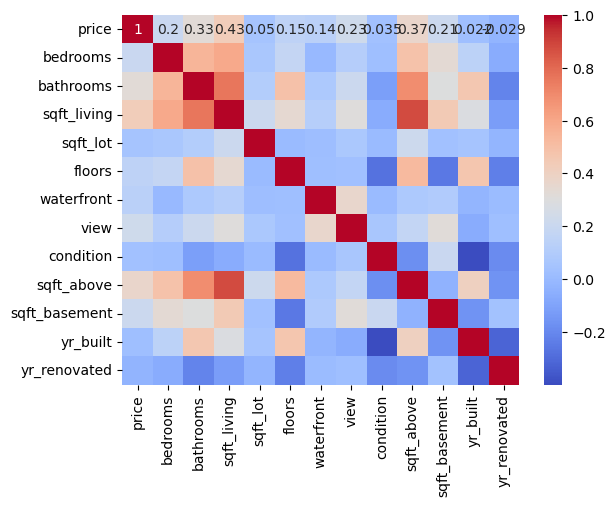

In [28]:
# Correlation matrix
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()


In [29]:
data = data.drop("yr_built" ,axis=1 )
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_renovated
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,2005
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,0
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,0
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,0
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1992


In [30]:
data = data.drop("yr_renovated" ,axis=1 )
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800


In [31]:
data = data.drop(["condition","waterfront","view","floors","sqft_lot",	"sqft_above","sqft_basement"] ,axis=1 )
data.head()

,price,bedrooms,bathrooms,sqft_living
0,313000.0,3.0,1.50,1340
1,2384000.0,5.0,2.50,3650
2,342000.0,3.0,2.00,1930
3,420000.0,3.0,2.25,2000
4,550000.0,4.0,2.50,1940


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

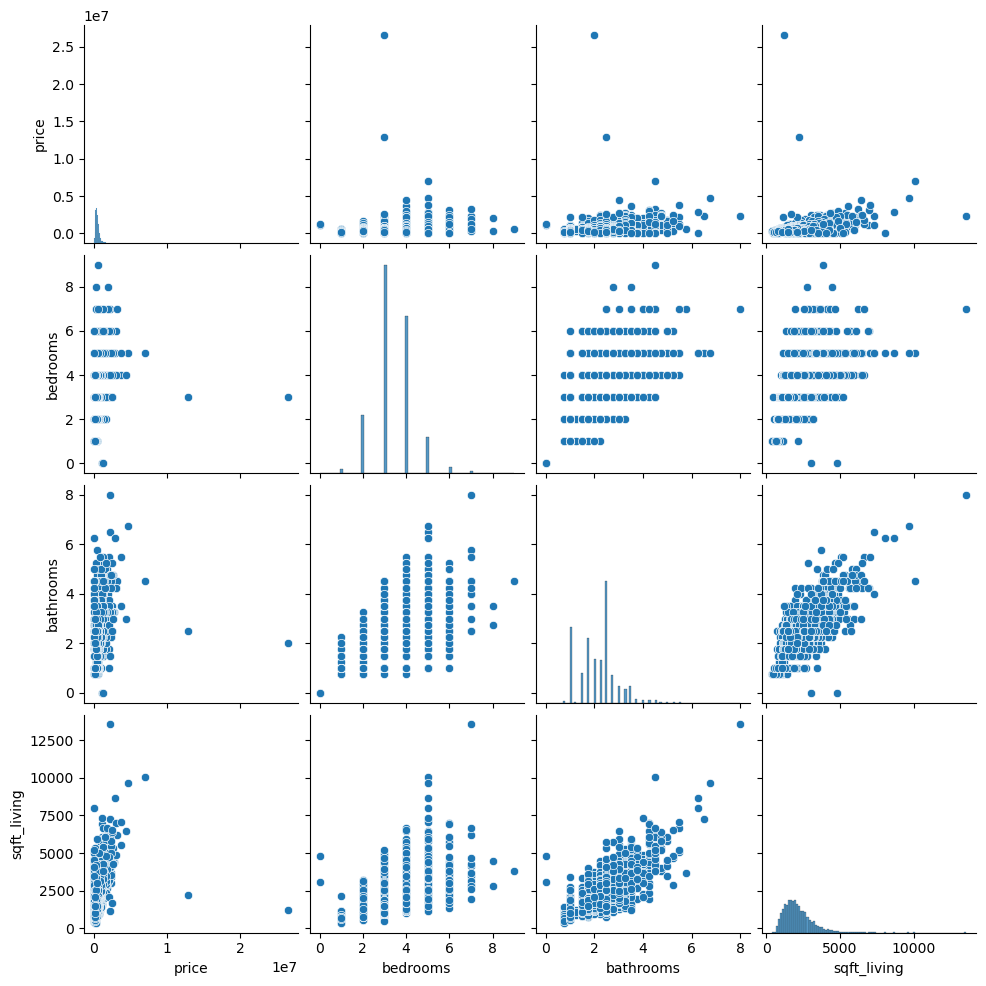

In [32]:
sns.pairplot(data)
plt.show()

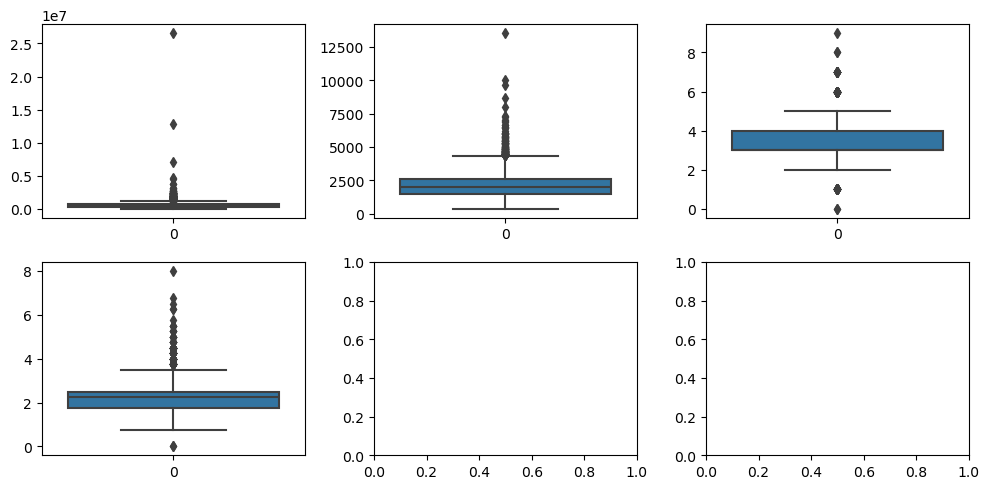

In [33]:
# Outlier Analysis
fig, axs = plt.subplots(2,3, figsize = (10,5))
plt1 = sns.boxplot(data['price'], ax = axs[0,0])
plt2 = sns.boxplot(data['sqft_living'], ax = axs[0,1])
plt3 = sns.boxplot(data['bedrooms'], ax = axs[0,2])
plt1 = sns.boxplot(data['bathrooms'], ax = axs[1,0])
#plt2 = sns.boxplot(data['stories'], ax = axs[1,1])
#plt3 = sns.boxplot(data['parking'], ax = axs[1,2])

plt.tight_layout()

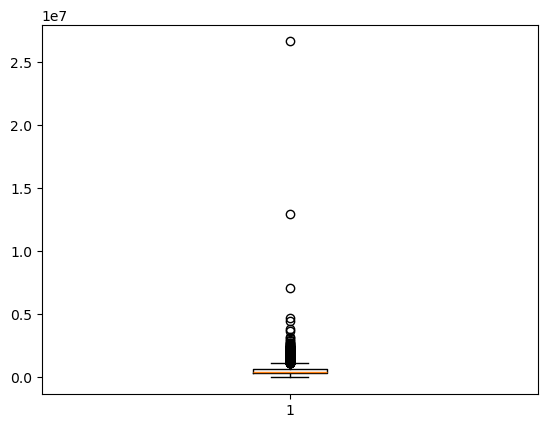

In [34]:
# outlier treatment for price
plt.boxplot(data.price)
Q1 = data.price.quantile(0.25)
Q3 = data.price.quantile(0.75)
IQR = Q3 - Q1
data = data[(data.price >= Q1 - 1.5*IQR) & (data.price <= Q3 + 1.5*IQR)]

# Model Development

In [35]:
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(data, train_size = 0.3, test_size = 0.1, random_state = 100)

In [36]:
scaler = MinMaxScaler()

In [37]:
num_vars = ['sqft_living', 'bedrooms', 'bathrooms', 'price']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [38]:
df_train.head()

,price,bedrooms,bathrooms,sqft_living
1801,0.256522,0.125,0.045455,0.103403
3579,0.886957,0.250,0.272727,0.168848
1796,0.413043,0.250,0.318182,0.290576
3476,0.521739,0.250,0.318182,0.374346
3264,0.182609,0.125,0.045455,0.077225


In [39]:
df_train.describe()

,price,bedrooms,bathrooms,sqft_living
count,1308.000000,1308.000000,1308.000000,1308.000000
mean,0.414362,0.290998,0.242841,0.215516
std,0.189426,0.109245,0.132766,0.107856
min,0.000000,0.000000,0.000000,0.000000
25%,0.272000,0.250000,0.181818,0.138416
50%,0.391278,0.250000,0.272727,0.198953
75%,0.524891,0.375000,0.318182,0.276342
max,1.000000,1.000000,1.000000,1.000000


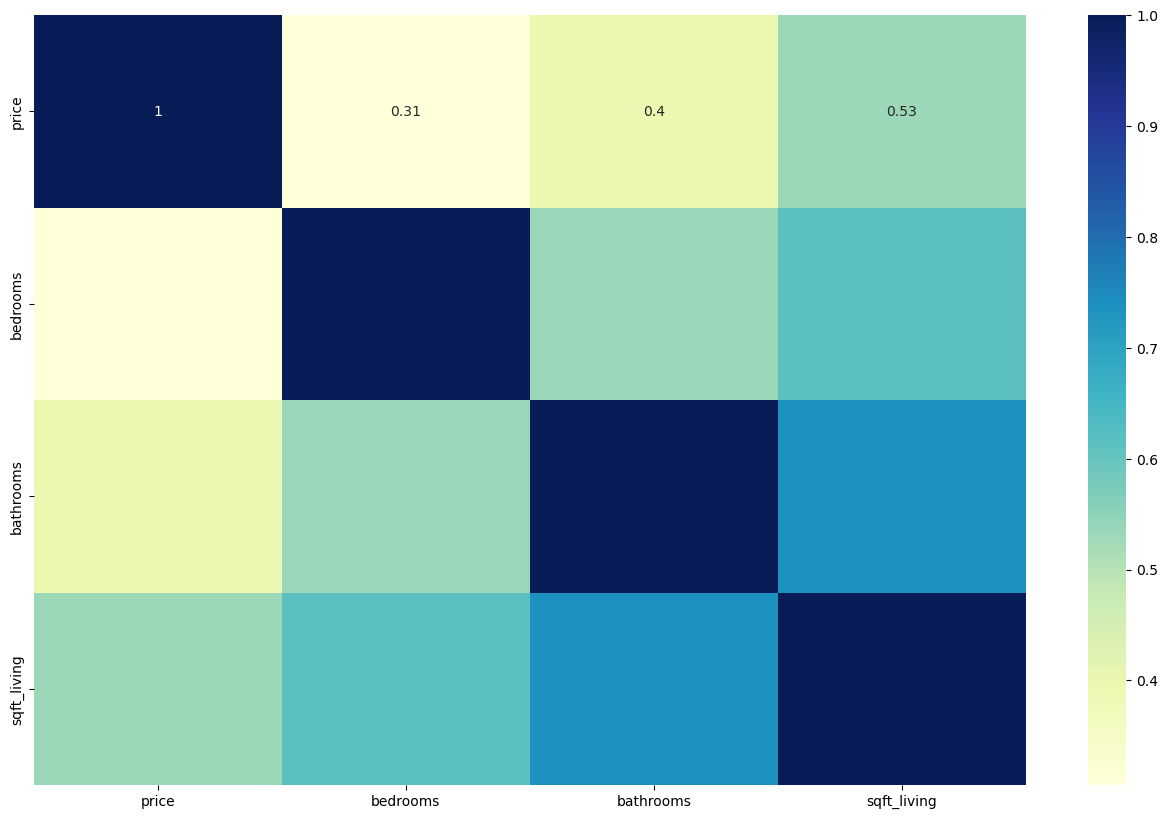

In [40]:
plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [41]:
y_train = df_train.pop('price')
X_train = df_train

In [42]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [43]:
rfe = RFE(estimator=lm, n_features_to_select=2)  # Correct way to instantiate RFE
rfe = rfe.fit(X_train, y_train)

In [44]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('bedrooms', True, 1), ('bathrooms', False, 2), ('sqft_living', True, 1)]

In [45]:
col = X_train.columns[rfe.support_]
col

Index(['bedrooms', 'sqft_living'], dtype='object')

In [46]:
X_train.columns[~rfe.support_]

Index(['bathrooms'], dtype='object')

In [47]:
X_train_rfe = X_train[col]

In [48]:
X_train_rfe = sm.add_constant(X_train_rfe)

In [49]:
lm = sm.OLS(y_train,X_train_rfe).fit()  

In [50]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.285
Model:                            OLS   Adj. R-squared:                  0.284
Method:                 Least Squares   F-statistic:                     259.8
Date:                Tue, 25 Jun 2024   Prob (F-statistic):           1.05e-95
Time:                        19:40:21   Log-Likelihood:                 539.93
No. Observations:                1308   AIC:                            -1074.
Df Residuals:                    1305   BIC:                            -1058.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2217      0.013     17.341      

In [51]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,8.32
1,bedrooms,1.60
2,sqft_living,1.60


In [52]:
y_train_price = lm.predict(X_train_rfe)
res = (y_train_price - y_train)

C:\Users\Dell Latitude 3410\AppData\Local\Temp\ipykernel_11388\4008029580.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_train - y_train_price), bins = 20)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 0, 'Errors')

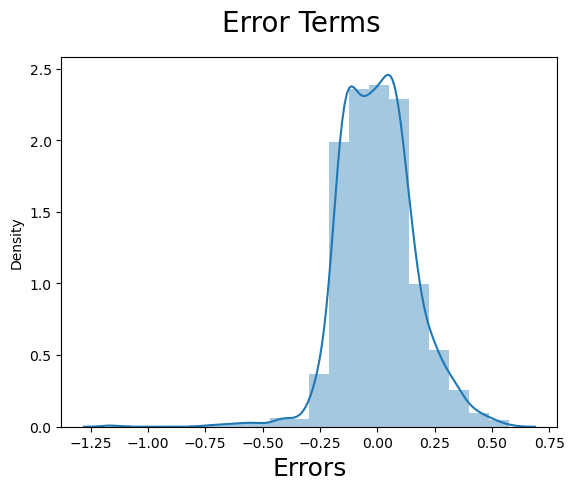

In [53]:
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)   

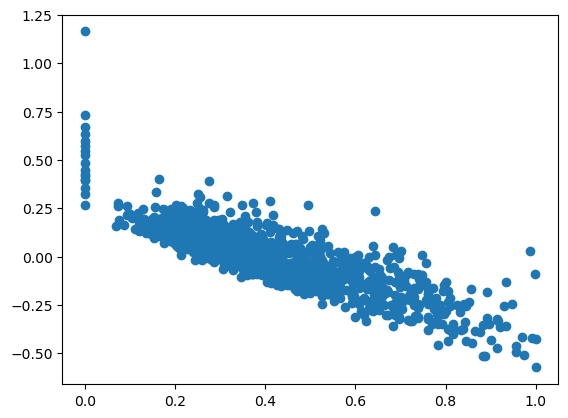

In [54]:
plt.scatter(y_train,res)
plt.show()

In [55]:
num_vars = ['sqft_living', 'bathrooms','price']

In [56]:
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [57]:
y_test = df_test.pop('price')
X_test = df_test

In [58]:
X_test = sm.add_constant(X_test)

In [59]:
X_test_rfe = X_test[X_train_rfe.columns]

In [60]:
y_pred = lm.predict(X_test_rfe)

In [61]:
# Calculate accuracy metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [62]:
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')


Mean Squared Error: 0.03248360484498448
R^2 Score: 0.1716908468488747


Text(0, 0.5, 'y_pred')

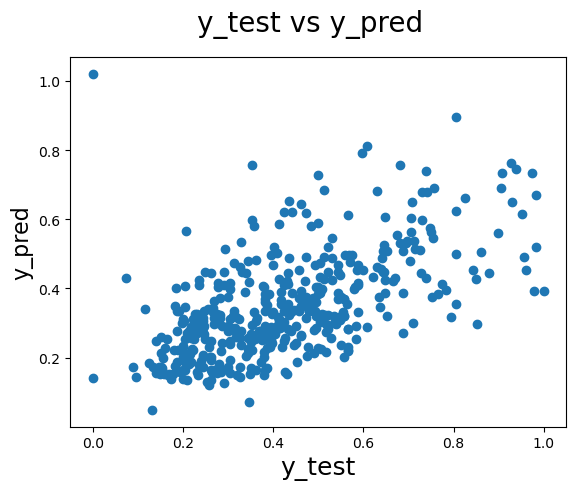

In [63]:
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)    